In [3]:
import sys
from matplotlib import pyplot
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout

In [ ]:
model = VGG16(weights='imagenet',
              include_top=False,
              input_shape=(224, 224, 3))

# mark loaded layers as not trainable
for layer in model.layers:
	layer.trainable = False
    
# add new classifier layers and dropout.
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(128,
               activation='relu',
               kernel_initializer='he_uniform')(flat1)
class1 = Dropout(0.5)(class1)
output = Dense(1,
               activation='sigmoid')(class1)

# define new model
model = Model(inputs=model.inputs, outputs=output)

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy', 'Recall', 'Precision'])

In [2]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [3]:
model = model
# create data generator
datagen_train = ImageDataGenerator( featurewise_center=True, 
                                    rotation_range=30,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=15,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True)

datagen_test = ImageDataGenerator(  featurewise_center=True,
                                    rotation_range=30,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=15,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True)

# specify imagenet mean values for centering
datagen_train.mean = [123.68, 116.779, 103.939]
datagen_test.mean = [123.68, 116.779, 103.939]

# prepare iterator
train_it = datagen_train.flow_from_directory('Dataset/train2/',
	class_mode='binary', batch_size=64,
    target_size=(224, 224), shuffle = True)

test_it = datagen_test.flow_from_directory('Dataset/test2/',
	class_mode='binary', batch_size=64,
    target_size=(224, 224), shuffle = True)


print(train_it.class_indices)
print(test_it.class_indices)
print(len(train_it) )

Found 9000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
{'0.-SinBacterias': 0, '1.-ConBacterias': 1}
{'0.-SinBacterias': 0, '1.-ConBacterias': 1}
141


In [4]:
import time
now = time.time()

# fit model
history = model.fit(train_it, 
                    steps_per_epoch=len(train_it)/7,
                    validation_data=test_it, 
                    validation_steps=len(test_it)/7, 
                    epochs=35, 
                    verbose=1)

print(time.time() - now)

Epoch 1/35
20/20 [==============================] - 585s 29s/step - loss: 1.7528 - accuracy: 0.7597 - recall: 0.7249 - precision: 0.7638 - val_loss: 0.6097 - val_accuracy: 0.7812 - val_recall: 0.8204 - val_precision: 0.7882
Epoch 2/35
20/20 [==============================] - 625s 31s/step - loss: 0.4960 - accuracy: 0.8088 - recall: 0.8169 - precision: 0.7937 - val_loss: 0.4052 - val_accuracy: 0.8214 - val_recall: 0.8210 - val_precision: 0.8282
Epoch 3/35
20/20 [==============================] - 598s 30s/step - loss: 0.3499 - accuracy: 0.8504 - recall: 0.8689 - precision: 0.8376 - val_loss: 0.4790 - val_accuracy: 0.7946 - val_recall: 0.7444 - val_precision: 0.8259
Epoch 4/35
20/20 [==============================] - 621s 31s/step - loss: 0.3504 - accuracy: 0.8591 - recall: 0.8817 - precision: 0.8490 - val_loss: 0.4200 - val_accuracy: 0.8125 - val_recall: 0.8333 - val_precision: 0.7974
Epoch 5/35
20/20 [==============================] - 677s 34s/step - loss: 0.2786 - accuracy: 0.8862 - re

In [6]:
# save model
model.save('model_1C128N0.5DROPBATCH64,\n
20Ssteps35epochs_data2.2.1.h5')

#Representa un modelo de 1 capa 128 Neuronas
#Dropout de 0.5, Batch Size de 64 
#20 steps por cada epoch y 35 epochs en total

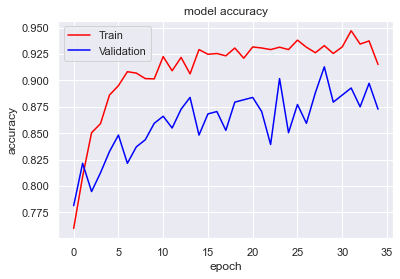

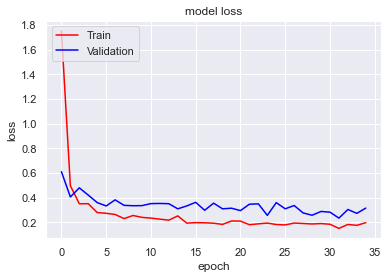

In [5]:
#Plot loss and accuracy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
# summarize history for accuracy
plt.plot(history.history['accuracy'], color = 'red')
plt.plot(history.history['val_accuracy'], color='blue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [7]:
#MATRIZ DE CONFUSIÓN

from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

datagen_test = ImageDataGenerator(featurewise_center=True)
datagen_test.mean = [123.68, 116.779, 103.939]
test_it = datagen_test.flow_from_directory('Dataset/test2/',
                                            class_mode='binary',
                                            batch_size=64,
                                            target_size=(224, 224),
                                            shuffle = False)

custom_Model= load_model('model_1C128N0.5DROPBATCH64,20Ssteps35epochs_data2.2.1.h5')

predictions = custom_Model.predict_generator(generator=test_it, verbose=1)

Found 3000 images belonging to 2 classes.


c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


47/47 [==============================] - 988s 21s/step


In [8]:
y_pred = [1 * (x[0]>=0.5) for x in predictions]
y_real = test_it.classes
names = ['0.-SinBacterias','1.-ConBacterias']

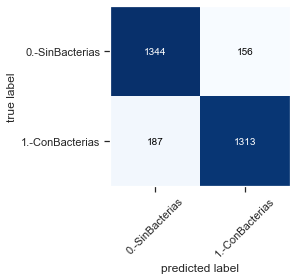

In [9]:
matc=confusion_matrix(y_real, y_pred)

plot_confusion_matrix(conf_mat=matc, class_names = names, show_normed=False)
plt.tight_layout()

In [10]:
print(metrics.classification_report(y_real,y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.8779    0.8960    0.8868      1500
           1     0.8938    0.8753    0.8845      1500

    accuracy                         0.8857      3000
   macro avg     0.8858    0.8857    0.8857      3000
weighted avg     0.8858    0.8857    0.8857      3000

